 #  Stroke Meaning :
 ### A stroke is a sudden disruption of blood flow to the brain, leading to neurological symptoms and requiring urgent medical attention.





 


# Effected Factors :
### 1. Gender: Gender can be a factor influencing the risk of stroke. For example, some studies suggest that men may be more prone to stroke at a younger age compared to women.

###  2. Age: The older a person gets, the higher the risk of stroke becomes. Elderly individuals are more susceptible to developing health issues that lead to stroke.

###  3. Hypertension: High blood pressure is a major risk factor for stroke. It damages blood vessels in the brain, increasing the likelihood of stroke.

###  4. Heart Disease: Having heart conditions such as angina or coronary artery disease increases the risk of stroke.

###  5. Ever Married: Marriage can be a factor in overall health and thus in stroke risk, depending on other associated factors such as lifestyle and diet.

###  6. Work Type and Residence Type: The type of work and place of residence may influence lifestyle habits and overall health, thereby affecting stroke risk.

###  7. Average Glucose Level and BMI: High blood sugar levels and overweight or obesity can increase the risk of stroke.

###  8. Smoking Status: Smoking is a significant risk factor for stroke.

# Load libraries


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.metrics import accuracy_score




In [49]:
#load the data
df_Stroke =pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\adham\brain_stroke.csv")


In [50]:
# This returns a tuple representing the dimensions of the DataFrame, where the first element  is the number of rows and the second element is the number of columns.
df_Stroke.shape 

(4981, 11)

In [51]:
# Retrieve the column names of the DataFrame df_Stroke.
df_Stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [52]:
df_Stroke.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1

In [53]:
df_Stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [54]:
# Generate descriptive statistics of the numerical columns in the DataFrame df_Stroke.
# This includes count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2),
# 75th percentile (Q3), and maximum values for each numerical column.
df_Stroke.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000

In [55]:
# Calculate the number of duplicated rows in the DataFrame df_Stroke.
# This returns the sum of boolean values indicating whether each row is duplicated or not.
df_Stroke.duplicated().sum()

0

In [56]:
# Calculate the number of missing values (NaN) in each column of the DataFrame df_Stroke.
df_Stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [57]:
# Replace the values in the 'stroke' column of the DataFrame df_Stroke.
df_Stroke['stroke'].replace({0: 'The patient did not have a stroke', 1: 'The patient had a stroke'}, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6804\4044122081.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Stroke['stroke'].replace({0: 'The patient did not have a stroke', 1: 'The patient had a stroke'}, inplace=True)


In [58]:
df_Stroke.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  \
0          Urban             228.69  36.6  formerly smoked   
1          Rural             105.92  32.5     never smoked   
2          Urban             171.23  34.4           smokes   
3          Rural             174.12  24.0     never smoked   
4          Urban             186.21  29.0  formerly smoked   

                     stroke  
0  The patient had a stroke  
1  The patient had a stroke  
2  The patient had a stroke  
3  The patient had a stroke  
4  The patient had a stroke

In [59]:

df_Stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [60]:
df_Stroke.shape

(4981, 11)

# Data visualization

In [61]:
df_Stroke.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  \
0          Urban             228.69  36.6  formerly smoked   
1          Rural             105.92  32.5     never smoked   
2          Urban             171.23  34.4           smokes   
3          Rural             174.12  24.0     never smoked   
4          Urban             186.21  29.0  formerly smoked   

                     stroke  
0  The patient had a stroke  
1  The patient had a stroke  
2  The patient had a stroke  
3  The patient had a stroke  
4  The patient had a stroke

In [62]:
df_Stroke['stroke'].value_counts()

stroke
The patient did not have a stroke    4733
The patient had a stroke              248
Name: count, dtype: int64

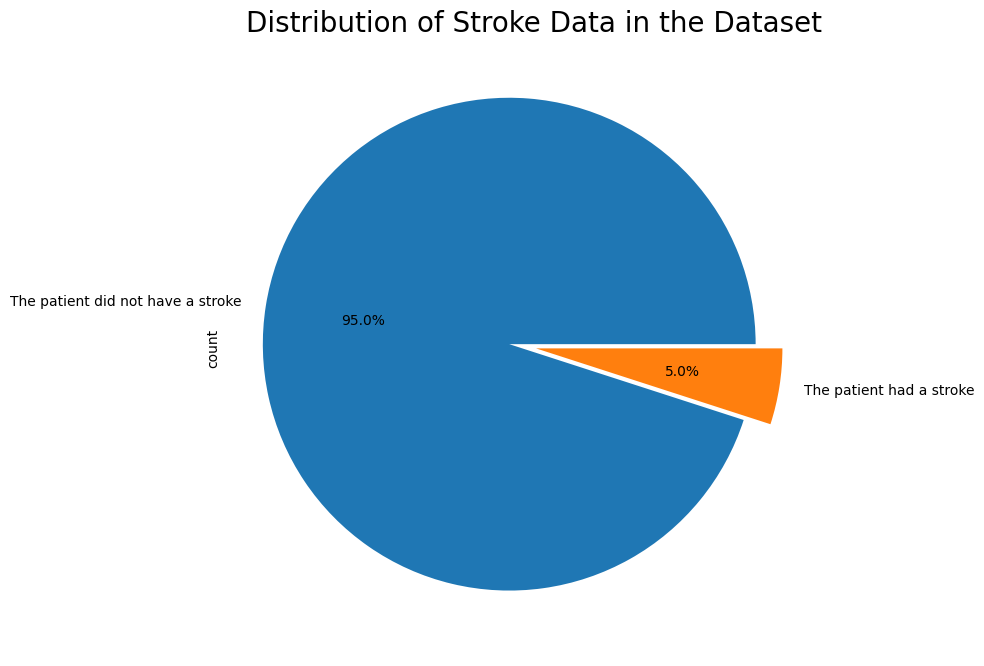

In [63]:
# Generate a pie chart to visualize the distribution of values in the 'stroke' column of the DataFrame df_Stroke.
# First, calculate the count of each unique value in the 'stroke' column using value_counts().
# Then, plot the pie chart with specified figure size (figsize), explode parameters to emphasize slices (explode),
# and autopct parameter to display the percentage of each slice.
# Finally, set the title of the plot and display it.

df_Stroke["stroke"].value_counts().plot.pie(figsize=(12,8),explode=(0.1,0.01),autopct="%1.1f%%")
plt.title("Distribution of Stroke Data in the Dataset",fontsize=20)
plt.show()

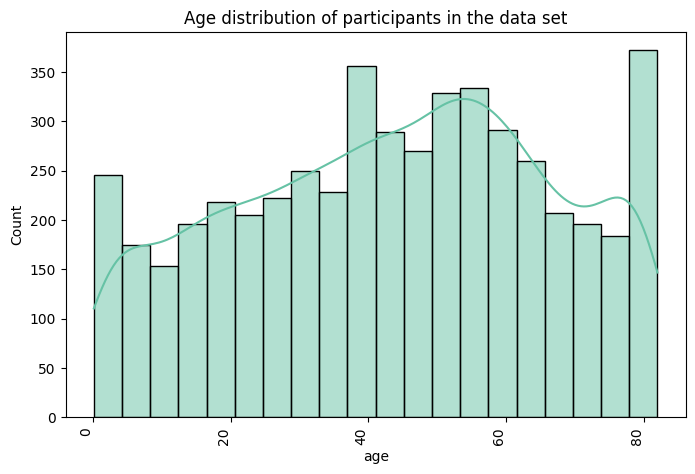

In [64]:



plt.figure(figsize=(8, 5))
palette = sns.color_palette("Set2")
sns.histplot(df_Stroke['age'], kde=True, color=palette[0])

plt.title(f'Age distribution of participants in the data set')
plt.xticks(rotation=90, ha="right")
plt.show()


Text(0.5, 1.0, 'Exploring Stroke Occurrence Across Different Age Groups')

<Figure size 2000x1000 with 0 Axes>

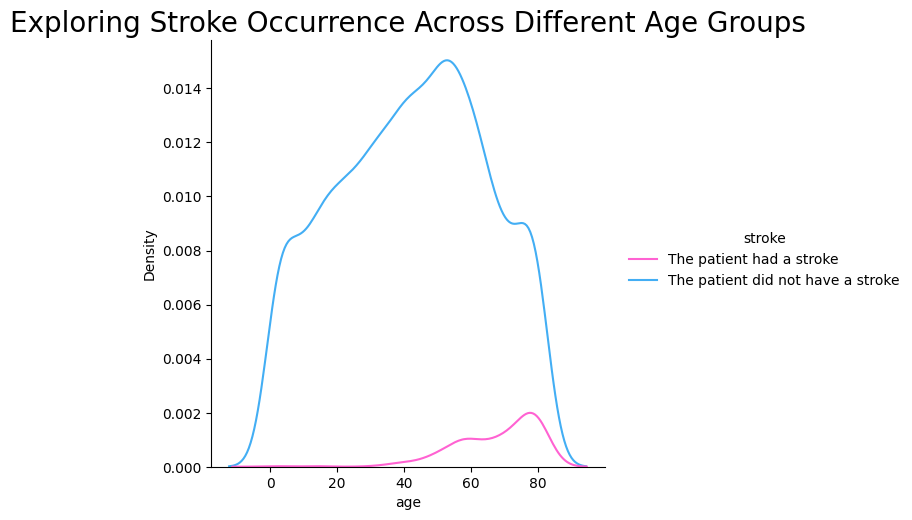

In [65]:
# Create a figure with a specified size using plt.figure(figsize=(20,10)).
# Use seaborn's displot function (sns.displot) to create a kernel density estimate (KDE) plot of the 'age' column from the DataFrame df_Stroke.
# The hue parameter is set to "stroke" to differentiate the KDE plots based on the "stroke" column.
# The kind parameter is set to "kde" to specify the type of plot as a KDE plot.
# Add a title to the plot indicating the exploration of stroke occurrence across different age groups.
# Finally, display the KDE plot.
my_palette = ["#FF62D2", "#43AEF4"]

plt.figure(figsize=(20,10))

sns.displot(data=df_Stroke, x="age", hue="stroke", kind="kde",palette=my_palette)
plt.title("Exploring Stroke Occurrence Across Different Age Groups",fontsize=20)

Text(0.5, 1.0, 'Comparison of age distribution between individuals affected and unaffected by stroke')

<Figure size 2000x1000 with 0 Axes>

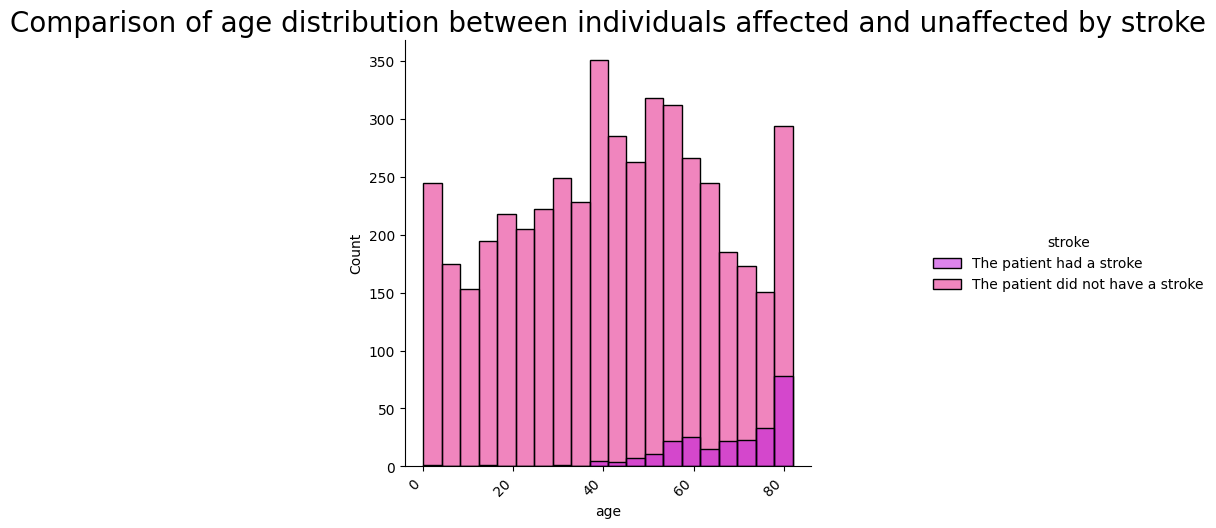

In [66]:
# Create a figure with a specified size using plt.figure(figsize=(20,10)).
# Define a color palette using sns.color_palette("Set2").
# Use seaborn's displot function (sns.displot) to create a histogram of the 'age' column from the DataFrame df_Stroke.
# The hue parameter is set to "stroke" to differentiate the histogram bars based on the "stroke" column.
# The bins parameter is set to 20 to specify the number of bins in the histogram.
# Set the color palette for the histogram using the palette parameter.
# Rotate the x-axis labels for better readability.
# Add a title to the plot comparing the age distribution between individuals affected and unaffected by stroke.
# Finally, display the histogram.




plt.figure(figsize=(20,10))
palette = sns.color_palette(["#BA0ADA" , "#E20C7E"])
sns.displot(data=df_Stroke, x="age", hue="stroke",bins=20, palette=palette)
plt.xticks(rotation=45, ha="right")
plt.title("Comparison of age distribution between individuals affected and unaffected by stroke",fontsize=20)

<Axes: ylabel='Density'>

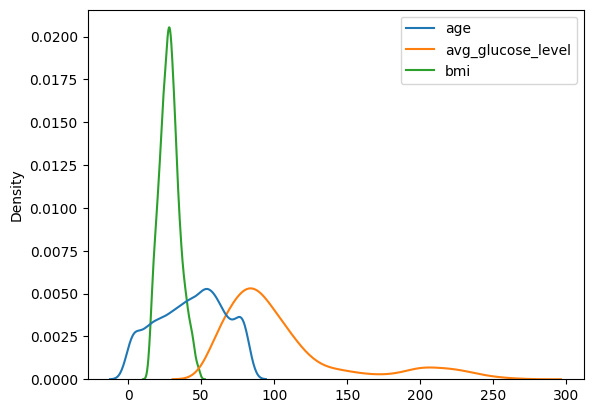

In [67]:
# Extract numerical columns 'age', 'avg_glucose_level', and 'bmi' from the DataFrame df_Stroke and store them in numerical_data.
# Use seaborn's kdeplot function (sns.kdeplot) to create a kernel density estimate (KDE) plot for each numerical column in numerical_data.
# This plot visualizes the distribution of each numerical variable using smoothed curves.
# The data parameter is set to numerical_data to specify the data to be plotted.



numerical_data = df_Stroke[['age','avg_glucose_level','bmi']]
sns.kdeplot(data=numerical_data)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6804\521757344.py:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x = df_Stroke['hypertension'] , hue=df_Stroke['stroke'], palette=palette)


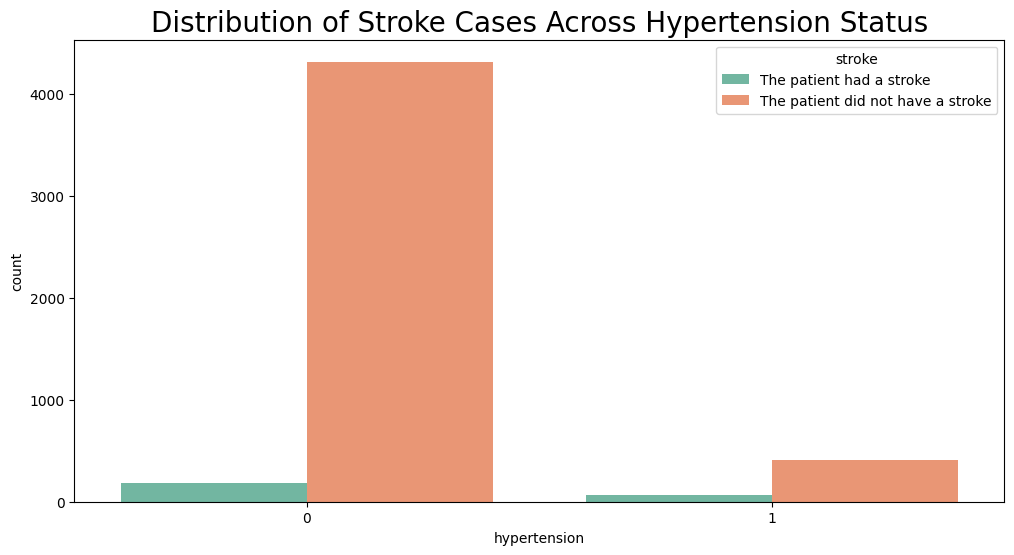

In [68]:
# Create a figure with a specified size using plt.figure(figsize=(12, 6)).
# Define a color palette using sns.color_palette("Set2").
# Use seaborn's countplot function (sns.countplot) to create a bar plot showing the distribution of stroke cases across hypertension status.
# The x parameter specifies the data to be plotted on the x-axis, which is the 'hypertension' column from the DataFrame df_Stroke.
# The hue parameter is set to 'stroke' to differentiate the bars based on the 'stroke' column.
# Set the color palette for the bars using the palette parameter.
# Add a title to the plot indicating the distribution of stroke cases across hypertension status.
# Finally, display the bar plot.





plt.figure(figsize=(12, 6))
palette = sns.color_palette("Set2")
sns.countplot(x = df_Stroke['hypertension'] , hue=df_Stroke['stroke'], palette=palette)
plt.title('Distribution of Stroke Cases Across Hypertension Status',fontsize=20)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6804\2642970815.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x = df_Stroke['heart_disease'] , hue=df_Stroke['stroke'], palette=palette)


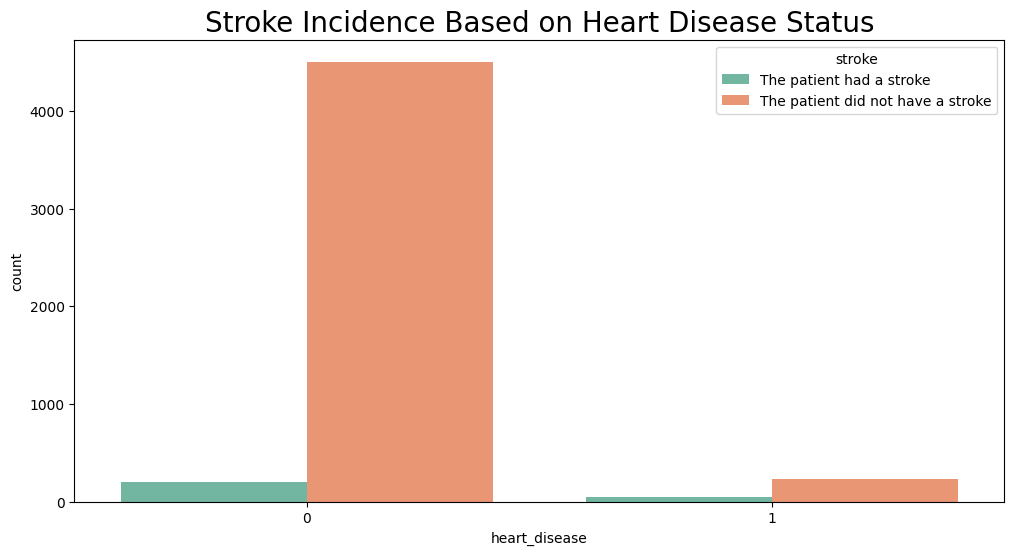

In [69]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Set2")
sns.countplot(x = df_Stroke['heart_disease'] , hue=df_Stroke['stroke'], palette=palette)
plt.title('Stroke Incidence Based on Heart Disease Status',fontsize=20)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6804\283438687.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.displot(data=df_Stroke, x="ever_married", hue="stroke",bins=20, palette=palette)


Text(0.5, 1.0, 'Impact of Marital Status on Stroke Incidence')

<Figure size 2000x1000 with 0 Axes>

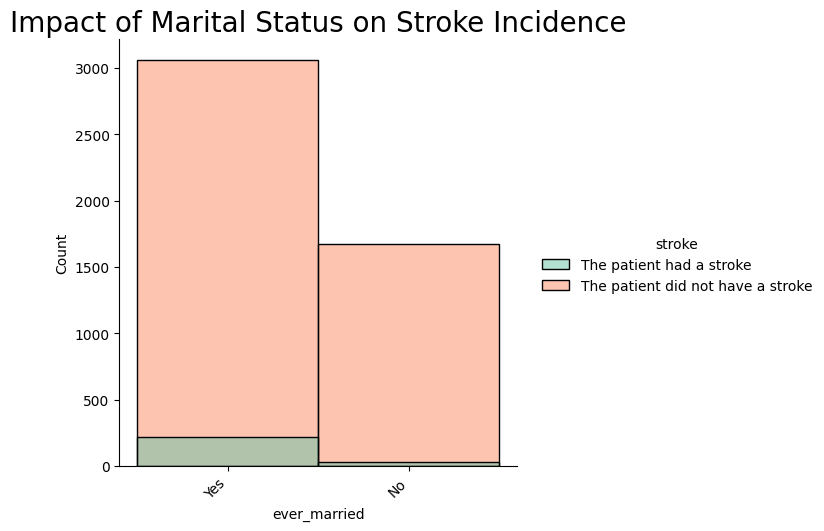

In [70]:
plt.figure(figsize=(20,10))
palette = sns.color_palette("Set2")
sns.displot(data=df_Stroke, x="ever_married", hue="stroke",bins=20, palette=palette)
plt.xticks(rotation=45, ha="right")
plt.title("Impact of Marital Status on Stroke Incidence",fontsize=20)

Text(0.5, 1.0, 'Analyzing Stroke Incidence with Respect to Average Glucose Levels')

<Figure size 2000x1000 with 0 Axes>

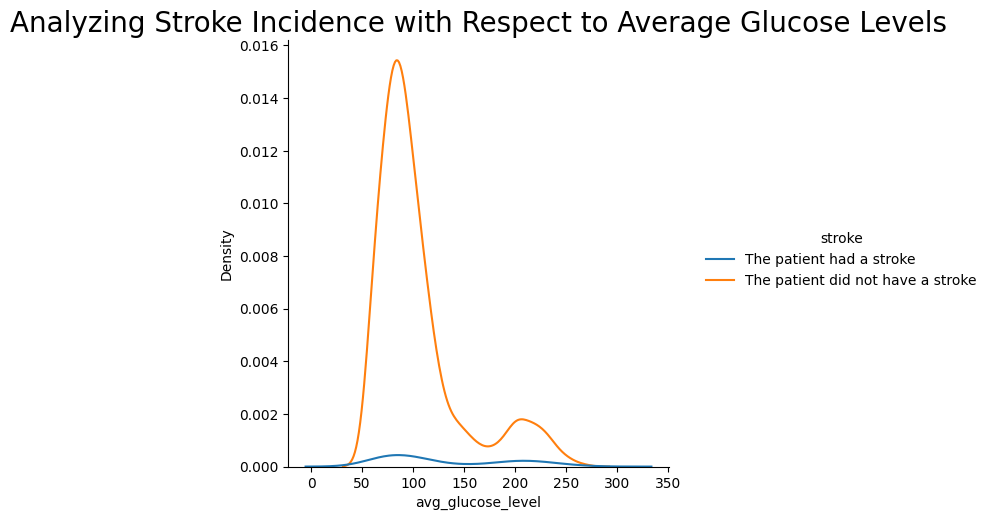

In [71]:
plt.figure(figsize=(20,10))

sns.displot(data=df_Stroke, x="avg_glucose_level", hue="stroke", kind="kde")
plt.title("Analyzing Stroke Incidence with Respect to Average Glucose Levels",fontsize=20)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6804\1132312503.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.displot(data=df_Stroke, x="work_type", hue="stroke",bins=20, palette=palette)


Text(0.5, 1.0, 'Impact of Work Type on Stroke Incidence')

<Figure size 1200x800 with 0 Axes>

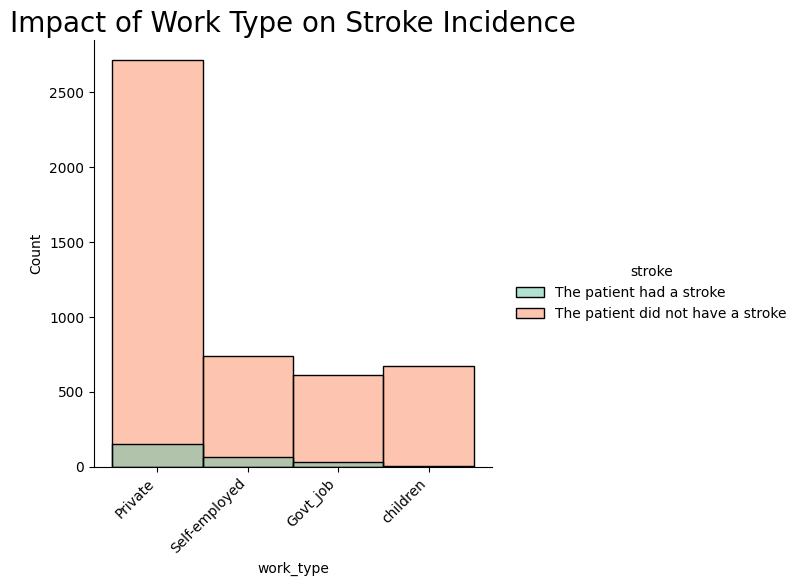

In [72]:
plt.figure(figsize=(12,8))
palette = sns.color_palette("Set2")
sns.displot(data=df_Stroke, x="work_type", hue="stroke",bins=20, palette=palette)
plt.xticks(rotation=45, ha="right")
plt.title("Impact of Work Type on Stroke Incidence",fontsize=20)

Text(0.5, 1.0, 'Analyzing Stroke Incidence in Relation to BMI')

<Figure size 2000x1000 with 0 Axes>

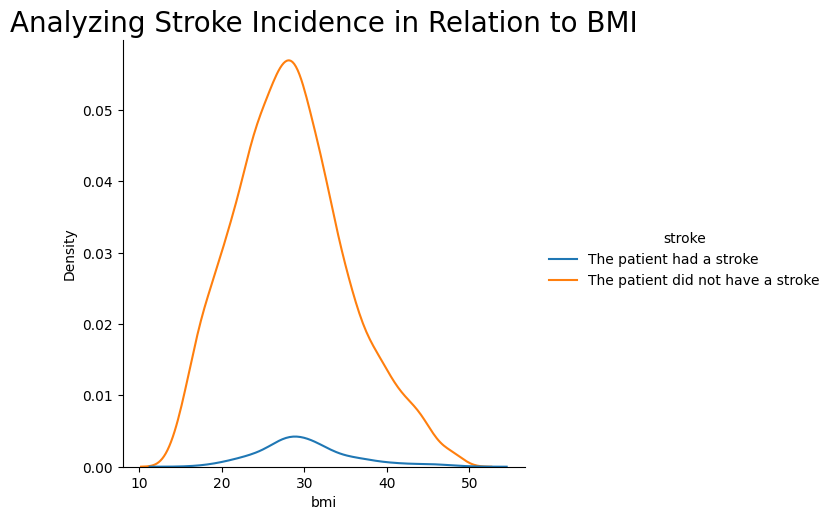

In [73]:
plt.figure(figsize=(20,10))

sns.displot(data=df_Stroke, x="bmi", hue="stroke", kind="kde")
plt.title("Analyzing Stroke Incidence in Relation to BMI",fontsize=20)

In [74]:
# Converting text values to numbers using Label Encoding
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_Stroke.columns:
    if df_Stroke[col].dtype=='object':
        df_Stroke[col]=le.fit_transform(df_Stroke[col])

# 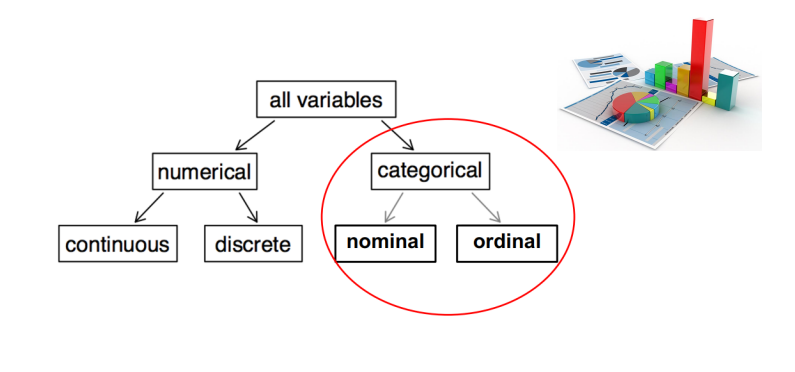

In [75]:
df_Stroke.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          1   
1       1  80.0             0              1             1          1   
2       0  49.0             0              0             1          1   
3       0  79.0             1              0             1          2   
4       1  81.0             0              0             1          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             105.92  32.5               2       1  
2               1             171.23  34.4               3       1  
3               0             174.12  24.0               2       1  
4               1             186.21  29.0               1       1

In [76]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
# Iterate over each column in the DataFrame
for col_name in df_Stroke.columns:
# Check if the number of unique values in the column is greater than 5
    if df_Stroke[col_name].nunique() > 5:
# Apply Min-Max scaling to the column if it has more than 5 unique values 
        df_Stroke[col_name] = scaler.fit_transform(df_Stroke[[col_name]])

# Feature scaling :
####  is a data preprocessing technique used to standardize the range of independent variables or features in the data.



In [77]:
df_Stroke.head()

gender       age  hypertension  heart_disease  ever_married  work_type  \
0       1  0.816895             0              1             1          1   
1       1  0.975586             0              1             1          1   
2       0  0.597168             0              0             1          1   
3       0  0.963379             1              0             1          2   
4       1  0.987793             0              0             1          1   

   Residence_type  avg_glucose_level       bmi  smoking_status  stroke  
0               1           0.801265  0.647564               1       1  
1               0           0.234512  0.530086               2       1  
2               1           0.536008  0.584527               3       1  
3               0           0.549349  0.286533               2       1  
4               1           0.605161  0.429799               1       1

In [78]:
# Separate features (X) and target variable (y)
# Features (X) are all columns except "stroke"
X = df_Stroke.drop("stroke",axis=1)
# Target variable (y) is the "stroke" column
y =df_Stroke['stroke']

In [79]:
X

gender       age  hypertension  heart_disease  ever_married  work_type  \
0          1  0.816895             0              1             1          1   
1          1  0.975586             0              1             1          1   
2          0  0.597168             0              0             1          1   
3          0  0.963379             1              0             1          2   
4          1  0.987793             0              0             1          1   
...      ...       ...           ...            ...           ...        ...   
4976       1  0.499512             0              0             0          1   
4977       1  0.487305             0              0             1          1   
4978       0  0.548340             1              0             1          0   
4979       1  0.487305             0              0             1          1   
4980       0  0.975586             1              0             1          1   

      Residence_type  avg_glucose_level       bmi  smoking_status  
0                  1           0.801265  0.647564               1  
1                  0           0.234512  0.530086               2  
2                  1           0.536008  0.584527               3  
3                  0           0.549349  0.286533               2  
4                  1           0.605161  0.429799               1  
...              ...                ...       ...             ...  
4976               0           0.069384  0.452722               1  
4977               1           0.627966  0.489971               3  
4978               0           0.184194  0.510029               3  
4979               0           0.133044  0.458453               3  
4980               1           0.132167  0.432665               2  

[4981 rows x 10 columns]

In [80]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 4981, dtype: int32

# Train model

In [81]:
# Import the train_test_split function from the scikit-learn model_selection module
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
# X_train and y_train will contain 70% of the data for training
# X_test and y_test will contain 30% of the data for testing
# The random_state parameter ensures reproducibility of the split
# The shuffle parameter is set to True to shuffle the data before splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [82]:
X_train

gender       age  hypertension  heart_disease  ever_married  work_type  \
4260       0  0.682617             0              0             1          2   
1658       1  0.426270             0              0             1          1   
1151       1  0.182129             0              0             0          1   
3975       1  0.670410             0              0             1          1   
647        0  0.157715             0              0             0          3   
...      ...       ...           ...            ...           ...        ...   
4426       0  0.658203             0              0             1          0   
466        0  0.462891             0              0             1          0   
3092       1  0.157715             0              0             0          1   
3772       0  0.004883             0              0             0          3   
860        0  0.694824             0              0             1          2   

      Residence_type  avg_glucose_level       bmi  smoking_status  
4260               1           0.198597  0.535817               1  
1658               1           0.127828  0.283668               2  
1151               0           0.108346  0.318052               0  
3975               0           0.116471  0.421203               3  
647                0           0.037577  0.157593               0  
...              ...                ...       ...             ...  
4426               1           0.814422  0.455587               2  
466                1           0.072939  0.790831               2  
3092               0           0.163789  0.083095               2  
3772               0           0.293740  0.097421               0  
860                0           0.337734  0.578797               2  

[3486 rows x 10 columns]

# LogisticRegression

In [83]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Logistic Regression accuracy score with all the features: 94.7826


# DecisionTreeClassifier

In [84]:
dec_clf=DecisionTreeClassifier(criterion='gini',random_state=3,max_depth=5)
dec_clf.fit(X_train,y_train)
y_pred=dec_clf.predict(X_test)
print('DecisionTreeClassifier accuracy score:', dec_clf.score(X_test, y_test)*100)

DecisionTreeClassifier accuracy score: 94.31438127090301


Score :  0.9431438127090301


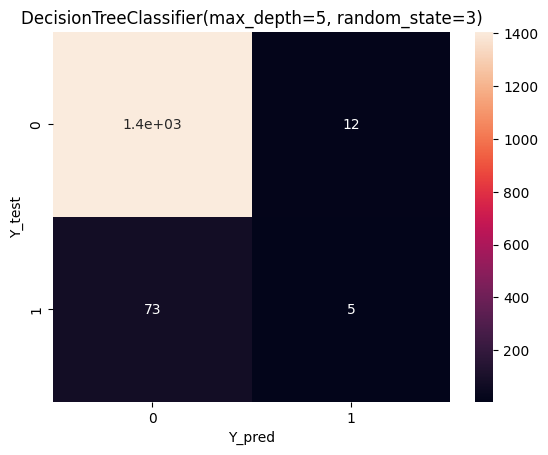

In [85]:
pred_list = [dec_clf]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

# RandomForestClassifier

In [86]:
rand_clf=RandomForestClassifier(n_estimators=20,criterion="entropy")
rand_clf.fit(X_train,y_train)
y_pred=rand_clf.predict(X_test)
print('RandomForestClassifier accuracy score:', rand_clf.score(X_test, y_test)*100)


RandomForestClassifier accuracy score: 94.44816053511705


Score :  0.9444816053511705


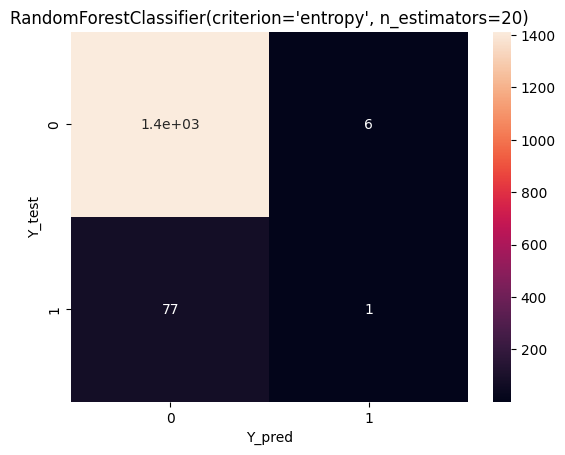

In [87]:
pred_list = [rand_clf]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

# SVM

In [88]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy for  SVM is ',metrics.accuracy_score(y_pred,y_test)*100)



Accuracy for  SVM is  94.78260869565217


Score :  0.9478260869565217


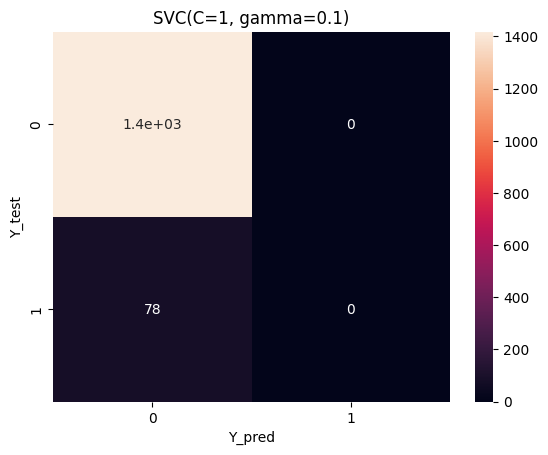

In [89]:
pred_list = [model]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

# NaiveBayes

In [90]:
NaiveBayes=GaussianNB()
NaiveBayes.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(y_pred,y_test))

The accuracy of the NaiveBayes is 0.9478260869565217


# Models Accuracy Comparison

In [91]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_mean=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':cv_mean,'Std':std},index=classifiers)       
new_models_dataframe2

CV Mean       Std
Linear Svm           0.950285  0.124694
Radial Svm           0.950285  0.124694
Logistic Regression  0.950285  0.124694
Decision Tree        0.899880  0.102326
Naive Bayes          0.851881  0.078384
Random Forest        0.948678  0.124187

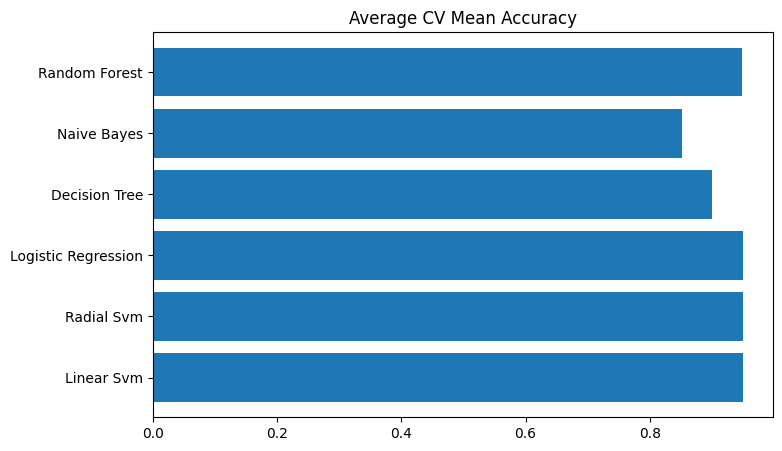

In [92]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

In [93]:
import pickle

with open('model.pickle','wb') as f:
  pickle.dump(model,f)